In [41]:
import os
import requests
import scipy
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
def Tscore(df, experimentalcols, controlcols):
    dfstat = pd.DataFrame()
    dfpval = pd.DataFrame()
    tempnum = 0
    row_header = df.iloc[:, 0]
    midpt = int((len(df.index)) / 2)
    for r in df.iterrows():
        row = r[1]
        controlvals = []
        experimentalvals = []
        for iter in controlcols:
            controlvals.append(row[iter])
        for iter in experimentalcols:
            experimentalvals.append(row[iter])

        stat, pval = scipy.stats.ttest_ind(experimentalvals[1:], controlvals[1:], equal_var=False)
        tempstatseries = pd.Series(stat)
        temppvalseries = pd.Series(pval)        
        dfstat = pd.concat([dfstat, tempstatseries])
        dfpval = pd.concat([dfpval, temppvalseries])

        if tempnum % 1000 == 0:
            print('T-scoring gene #' + str(tempnum))
        tempnum = tempnum + 1
       
    #calculate log10 of pvalues
    df2 = pd.concat([dfstat, dfpval], axis = 1)
    df2.columns = ['Tscore', 'pval']
    oldpval = df2['pval']  
    newpval = []
    for i in oldpval:
        tempnewpval = np.log10(i)
        tempnewpval = tempnewpval * (-1)
        newpval.append(float(tempnewpval))
    df2['log10pval'] = newpval
    dfstat = df2['log10pval']
    
    #save gene signature data
    df2.set_index(row_header, inplace=True)
    filename = 'output\Tscoredata.txt'
    df2.to_csv(filename, sep='\t', index=True)
    print('Tscore done')
    print()
    return dfstat

In [43]:
def FCstat(df, experimentalcols, controlcols):
    dfFC = pd.DataFrame()
    tempnum = 0
    row_header = df.iloc[:, 0]
    for r in df.iterrows():
        geneID = r[0]
        row = r[1]
        controlvals = []
        experimentalvals = []
        for iter in controlcols:
            controlvals.append(row[iter])
        for iter in experimentalcols:
            experimentalvals.append(row[iter])
        
        m1 = np.mean(experimentalvals[1:])
        m2 = np.mean(controlvals[1:])
        FC = m1 - m2
        tempFC = pd.Series(FC, name = geneID)        
        dfFC = pd.concat([dfFC, tempFC])

        if tempnum % 1000 == 0:
            print('FC of gene #' + str(tempnum))
        tempnum = tempnum + 1
    dfFC = dfFC.reset_index(drop=True)    

    #save gene signature data    
    filename = 'output\FCdata.txt'
    dfFC2 = dfFC
    dfFC2.set_index(row_header, inplace=True)
    dfFC2.to_csv(filename, sep='\t', index=True, header=False) #change file name as needed
    print('FC done')
    print()
    return dfFC

In [44]:
df = pd.read_csv('volcanoplotdataPAlog2.txt', low_memory=False, delimiter = "\t") #change file name as needed
cwd = os.getcwd()
path = cwd + "\output"
if not os.path.exists(path):
    os.mkdir(path)

In [45]:
experimentalcols = [9, 10, 11, 12, 13, 14, 15, 16, 17]
for l in experimentalcols:
    print(df.columns[l+1]) #check this output to ensure proper column selection
print()

log2mutSA1
log2mutSA2
log2mutSA3
log2mutSB1
log2mutSB2
log2mutSB3
log2mutSC1
log2mutSC2
log2mutSC3



In [46]:
controlcols = [0, 1, 2, 3, 4, 5, 6, 7, 8]
for l in controlcols:
    print(df.columns[l+1]) #check this output to ensure proper column selection
print()

log2PAO1A1
log2PAO1A2
log2PAO1A3
log2PAO1B1
log2PAO1B2
log2PAO1B3
log2PAO1C1
log2PAO1C2
log2PAO1C3



In [47]:
log10pvaldf = Tscore(df, experimentalcols, controlcols)

T-scoring gene #0
T-scoring gene #1000
T-scoring gene #2000
T-scoring gene #3000
T-scoring gene #4000
T-scoring gene #5000
Tscore done



In [48]:
dfFC = FCstat(df, experimentalcols, controlcols)

                gene  log2PAO1A1  log2PAO1A2  log2PAO1A3  log2PAO1B1  \
0          PA2000_at   -1.357277   -1.677336   -1.797266   -2.928604   
1          PA1999_at   -1.398507   -1.260993   -1.636459   -2.654189   
2          PA3331_at   -0.180129   -0.638883   -1.392169   -6.055519   
3          PA0122_at   -1.704455   -1.942102   -2.676869   -4.549237   
4          PA3334_at    0.404006   -1.225205   -1.814426   -5.743449   
...              ...         ...         ...         ...         ...   
5886       PA4916_at    1.615013    2.125650    2.043228    1.572274   
5887  PA0520_nirQ_at    0.759342    1.128158    1.516278    1.317220   
5888       PA3530_at    1.023445    1.220867    0.530624   -0.324427   
5889  PA0511_nirJ_at    0.701777    1.444566    1.827528    2.051036   
5890       PA4921_at    1.316176    1.709311    1.852269    1.742718   

      log2PAO1B2  log2PAO1B3  log2PAO1C1  log2PAO1C2  log2PAO1C3  log2mutSA1  \
0      -5.354050    1.474734   -0.572811   -0.007846   

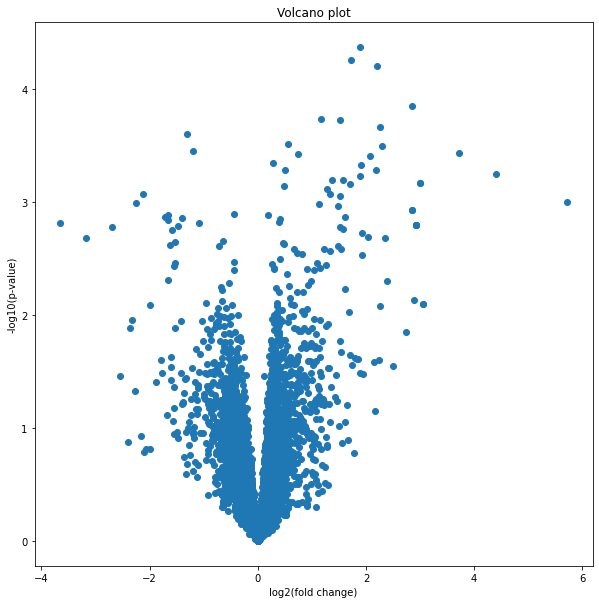

In [49]:
#plot results
xval = dfFC
yval = log10pvaldf

plt.figure(figsize=(10, 10))
plt.scatter(xval, yval)
plt.title("Volcano plot")
plt.xlabel("log2(fold change)")
plt.ylabel("-log10(p-value)")
plt.savefig('volcanoplotfig.png', dpi=300)
plt.show()

In [50]:
besthighFClist = []
bestlowFClist = []
normalFClist = []
besthighpvallist = []
bestlowpvallist = []
normalpvallist = []
besthighpos = []
bestlowpos = []

pnotFCFClist = []
pnotFCpvallist = []
FCnotpFClist = []
FCnotppvallist = []

tempFCarray = dfFC[0]
tempnum = 0

for i in log10pvaldf:
    i2 = tempFCarray[tempnum]
    if i > 1: #p<0.05
        if i2 > 1: #FC for top genes
            besthighFClist.append(i2)
            besthighpvallist.append(i)
            besthighpos.append(tempnum)
        elif i2 < -1: #FC for bottom genes
            bestlowFClist.append(i2)
            bestlowpvallist.append(i)
            bestlowpos.append(tempnum)
        else:
            pnotFCFClist.append(i2)
            pnotFCpvallist.append(i)
    else:
        if i2 > 1 or i2 < -1: #FC for top and bottom genes
            FCnotpFClist.append(i2)
            FCnotppvallist.append(i)
        else:
            normalFClist.append(i2)
            normalpvallist.append(i)
    tempnum = tempnum + 1

top = []
for i in besthighpos:
    r = df.iloc[[i]]
    geneID = list(r['gene'])
    top.append(geneID)

bottom = []
for i in bestlowpos:
    r = df.iloc[[i]]
    geneID = list(r['gene'])
    bottom.append(geneID)

print('There are', (len(top)) , 'top items:')
for i in top:
    print(i[0])
print()
print('There are', (len(bottom)) , 'bottom items:')
for i in bottom:
    print(i[0])

There are 110 top items:
PA2000_at
PA1999_at
PA3331_at
PA0122_at
PA3334_at
PA2567_at
PA4217_at
PA0176_at
PA3330_at
PA2001_atoB_at
PA3332_at
PA2366_at
PA3333_fabH2_at
PA3329_at
PA3328_at
PA5352_at
PA0179_at
PA3335_at
PA2788_at
PA2193_hcnA_at
PA1173_napB_at
PA1869_at
PA2003_bdhA_at
PA0175_at
PA3361_at
PA1001_phnA_at
PA0177_at
PA1174_napA_at
PA3327_at
PA3740_at
PA1172_napC_at
PA2365_at
PA0174_at
PA1657_at
PA2367_at
PA0178_at
PA2368_i_at
PA2370_at
PA3922_at
PA1665_at
PA2573_at
PA2360_at
PA4296_at
PA2002_at
PA0180_at
PA3205_at
PA2372_at
PA2445_gcvP2_at
PA2652_at
PA5355_glcD_at
PA1458_at
PA3662_at
PA1000_at
PA3307_r_at
PA1473_at
PA1474_at
PA3348_at
PA5353_glcF_at
PA0997_at
PA2654_at
PA3351_at
PA4324_at
PA3049_rmf_at
PA1679_at
PA2462_at
PA3353_at
PA1545_at
PA4309_pctA_at
PA4310_pctB_at
PA4633_at
PA1095_at
PA1561_aer_at
PA4843_at
PA1092_fliC_at
PA1093_at
PA4310_pctB_at
PA4633_at
PA1095_at
PA1561_aer_at
PA4843_at
PA3349_at
PA4326_at
PA3722_at
PA1913_at
PA0998_at
PA3352_at
PA5354_glcE_at
PA0999_

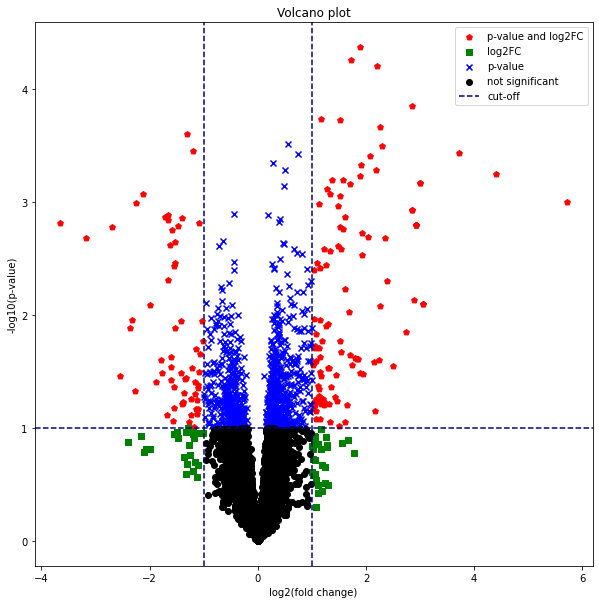

In [51]:
#plot results
plt.figure(figsize=(10, 10))
plt.scatter(besthighFClist, besthighpvallist, label = 'p-value and log2FC', color = 'red', marker = 'p')
plt.scatter(bestlowFClist, bestlowpvallist, color = 'red', marker = 'p')
plt.scatter(FCnotpFClist, FCnotppvallist, label = 'log2FC', color = 'green', marker = 's')
plt.scatter(pnotFCFClist, pnotFCpvallist, label = 'p-value', color = 'blue', marker = 'x')
plt.scatter(normalFClist, normalpvallist, label = 'not significant', color = 'black', marker = 'o')
plt.axhline(y=1, color='navy', linestyle='--', label = 'cut-off')
plt.axvline(x=1, color='navy', linestyle='--')
plt.axvline(x=-1, color='navy', linestyle='--')
plt.title("Volcano plot")
plt.xlabel("log2(fold change)")
plt.ylabel("-log10(p-value)")
plt.legend(loc='best')
plt.savefig('volcanoplotfig.png', dpi=300)
plt.show()